## Описание проекта

Интернет-магазин «В один клик» столкнулся с проблемой снижения покупательской активности постоянных клиентов. Привлечение новых покупателей становится менее эффективным, так как большая часть целевой аудитории уже знает о магазине. В связи с этим руководство решило сосредоточиться на удержании активности постоянных клиентов через персонализированные предложения, основанные на анализе данных и бизнес-моделировании.

**Цель проекта** - построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


**Задача проекта** - промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
Нужно собрать данные по клиентам по следующим группам:    <br>

Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.    <br>

**Краткий план работы**<br>
1. Обзор и подготовка данных<br>
2. Предобработка данных<br>
3. Исследовательский и корреляционный анализ<br>
4. Разработка нескольких вариантов моделей прогнозирования удоя<br>
    Оценка качества моделей с помощью метрик и выбор лучшей модели.<br>
5. Разработка модели прогнозирования вкуса молока, оценка модели<br>
6. Отбор коров, удовлетворяющих заданным критериям, на основе прогноза моделей.<br>
8. Анализ результатов и рекомендации</div>

## Описание данных

Данные для работы находятся в нескольких таблицах.    <br>
    <br>
***market_file.csv***    <br>
    <br>
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.    <br>

*id* — номер покупателя в корпоративной базе данных.    <br>
*Покупательская активность* — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».    <br>
*Тип сервиса* — уровень сервиса, например «премиум» и «стандарт».    <br>
*Разрешить сообщать* — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.    <br>
*Маркет_актив_6_мес* — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.    <br>
*Маркет_актив_тек_мес* — количество маркетинговых коммуникаций в текущем месяце.    <br>
*Длительность* — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.    <br>
*Акционные_покупки* — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.    <br>
*Популярная_категория* — самая популярная категория товаров у покупателя за последние 6 месяцев.    <br>
*Средний_просмотр_категорий_за_визит* — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.    <br>
*Неоплаченные_продукты_штук_квартал* — общее число неоплаченных товаров в корзине за последние 3 месяца.<br>
*Ошибка_сервиса* — число сбоев, которые коснулись покупателя во время посещения сайта. <br>
*Страниц_за_визит* — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br><br>

***market_money.csv***     <br>
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.    <br>
*id* — номер покупателя в корпоративной базе данных.    <br>
*Период* — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.    <br>
*Выручка* — сумма выручки за период.    <br>
***market_time.csv***     <br>
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.    <br>
*id* — номер покупателя в корпоративной базе данных.    <br>
*Период* — название периода, во время которого зафиксировано общее время.    <br>
минут — значение времени, проведённого на сайте, в минутах.    <br>
***money.csv***     <br>
Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.    <br>
*id* — номер покупателя в корпоративной базе данных.    <br>
*Прибыль* — значение прибыли.    <br>


## Загрузка данных

In [ ]:
# Установка необходимых библиотек
!pip install jupyter-black -q
!pip install --upgrade scikit-learn -q
!pip install shap -q

# Импорт библиотек
import warnings
import jupyter_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    GridSearchCV,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    f1_score,
    roc_auc_score,
)
from sklearn.impute import SimpleImputer

import shap

# Загрузка автоформатера
jupyter_black.load()

# Скроем лишние предупреждения
warnings.filterwarnings("ignore")

# Установка опции Pandas для вывода всех столбцов и строк
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Установка формата отображения чисел без разделителя тысяч
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Объявляем константы в соответствии с PEP-8
RANDOM_STATE = 42
TEST_SIZE = 0.25

#Импорт необходимых библиотек
!pip install -Uq scikit-learn
import sklearn

##### Функции

In [ ]:
# Функция для осмотра информации о датафрейме
def information_data(data):
    display("Общая информация")
    display(data.info())
    display("Первые пять строк")
    display(data.head())
    display("Количество пропусков")
    display(data.isna().sum())
    display("Количество дубликатов")
    display(data.duplicated().sum())
    display("Название столбцов")
    display(data.columns)

In [ ]:
# Создадим функцию  для сортировки столбцов датафрейма на категориальные и числовые
def sort_columns_by_type(dataframe):
    categorical_features = []
    numerical_features = []

    for column in dataframe.columns:
        if dataframe[column].dtype == "object":
            categorical_features.append(column)
        else:
            numerical_features.append(column)

    return categorical_features, numerical_features

In [ ]:
# Создадим функцию построения гистограммы и боксплота для количественных данных датафреймов
def plot_quantitative_column(df, column_name):
    plt.figure(figsize=(12, 6))

    # Вычисляем среднее и медиану
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Распределение {column_name}")

    # Добавляем линии среднего и медианы
    plt.axvline(
        mean_value, color="red", linestyle="--", label=f"Среднее: {mean_value:.2f}"
    )
    plt.axvline(
        median_value, color="green", linestyle="-", label=f"Медиана: {median_value:.2f}"
    )

    plt.legend()  # Отображаем легенду

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot {column_name}")

    plt.tight_layout()
    plt.show()

In [ ]:
# Создадим функцию построения столбчатой и круговой диаграмм для категориальных данных датафреймов
def plot_column(df, column_name):
    value_counts = df[column_name].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    sns.countplot(data=df, x=column_name, order=value_counts.index, ax=axs[0])
    axs[0].set_title(f"Распределение {column_name} (столбчатая диаграмма)")
    axs[0].tick_params(axis="x", rotation=45)

    value_counts.plot.pie(autopct="%1.1f%%", startangle=90, ax=axs[1])
    axs[1].set_title(f"Распределение {column_name} (круговая диаграмма)")
    axs[1].axis("equal")

    plt.tight_layout()
    plt.show()

##### Загрузка данных

In [ ]:
# Загрузка файла с данными и сохранение
try:
    market_file = pd.read_csv("/datasets/market_file.csv")
    market_money = pd.read_csv("/datasets/market_money.csv")
    market_time = pd.read_csv("/datasets/market_time.csv")
    money = pd.read_csv("/datasets/money.csv", sep=";", decimal=",")
except:
    market_file = pd.read_csv("https://code.net/datasets/market_file.csv")
    market_money = pd.read_csv("https://code.net/datasets/market_money.csv")
    market_time = pd.read_csv("https://code.net/datasets/market_time.csv")
    money = pd.read_csv(
        "https://code.s3.yandex.net/datasets/money.csv", sep=";", decimal=","
    )

##  Предобработка данных

##### market_file

Проведем обзор и необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

In [ ]:
# Выведем информацию о датафрейме market_file с помощью функции
information_data(market_file)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

'Первые пять строк'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2


'Количество пропусков'

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

'Количество дубликатов'

0

'Название столбцов'

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

В датафрейме market_file 13 столбцов и 1300 строк.

Данные соответсвуют описанию, типы данных корректны, кроме:
- столбца id - стоит заменить на object,
- столбцы Маркет_актив_тек_мес, Длительность, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Ошибка_сервиса, Страниц_за_визит имеют тип данных int64 - необходимо изменить на float.

Пропусков и явных дубликатов нет.

Столбцы необходимо привести к удобному формату и нижнему регистру, сохранив кириллические названия.

In [ ]:
# исправим наименования столбцов на нижний регистр и приведем к единому формату
market_file.columns = (
    market_file.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace(",", "_")
    .str.replace("__", "_")
)

# Проверка результата
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2


Наименования столбцов испрвалены.

Проверим строковые данные на наличие опечаток - неявных дубликатов.

In [ ]:
# Для этого с помощью ранее созданной функции отсортируем числовые и категориальные признаки.
categorical_features, numerical_features = sort_columns_by_type(market_file)

categorical_features

['покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'популярная_категория']

In [ ]:
# выведем уникальные значения столбца 'активность'
market_file["покупательская_активность"].value_counts()

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

Дубликатов нет

In [ ]:
# выведем уникальные значения столбца 'сервис'
market_file["тип_сервиса"].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

Есть неявный дубликат 'стандарт' - 'стандартт' (10 наблюдений "стандартт" - слишком мало, чтобы быть отдельной категорией сервиса).

In [ ]:
# исправим на верное значение
market_file["тип_сервиса"] = market_file["тип_сервиса"].replace("стандартт", "стандарт")
# и проверим
market_file["тип_сервиса"].value_counts()

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

Неявный дубликат устранен.

In [ ]:
# выведем уникальные значения столбца 'рассылка'
market_file["разрешить_сообщать"].value_counts()

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

Нет скрытых дубликатов

In [ ]:
# выведем уникальные значения столбца 'активность'
market_file["популярная_категория"].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

Нет скрытых дубликатов

Приведем типы численных данных к float64

In [ ]:
# ранее с помощью функции были отсортированы численные признаки, выведем их
numerical_features

['id',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит']

In [ ]:
# Столбец id  - это не численный признак, его следует изменить на тип str (object)
market_file["id"] = market_file["id"].astype(str)

# ранее выделены числовые данные, часть из них имеют тип данных int64
numerical_features = [
    "маркет_актив_6_мес",
    "маркет_актив_тек_мес",
    "длительность",
    "акционные_покупки",
    "средний_просмотр_категорий_за_визит",
    "неоплаченные_продукты_штук_квартал",
    "ошибка_сервиса",
    "страниц_за_визит",
]

# преобразуем их в тип float
for col in numerical_features:
    market_file[col] = pd.to_numeric(market_file[col], errors="coerce").astype(
        "float64"
    )

# проверим преобразование
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   object 
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   float64
 6   длительность                         1300 non-null   float64
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   float64
 10  неоплаченные_продукты_штук_квартал   1300 non-null   float64
 11  ошибка_сервиса                

Типы данных скорректированы.

Итак, в датафрейме market_file 13 столбцов и 1300 строк.

Данные соответсвуют описанию, типы данных исправлены на корректные.

Пропусков и явных дубликатов нет.

Исправлены неявные дубликаты/ошибки в столбцах категориальных данных.

Столбцы приведены к нижнему регистру, сохраняя кириллические названия.

##### market_money

In [ ]:
# Выведем информацию о датафрейме market_money с помощью функции
information_data(market_money)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

'Первые пять строк'

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,3293.10
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,4472.00
4,215349,текущий_месяц,4971.60


'Количество пропусков'

id         0
Период     0
Выручка    0
dtype: int64

'Количество дубликатов'

0

'Название столбцов'

Index(['id', 'Период', 'Выручка'], dtype='object')

Датафррейм market_money имеет 3 столбца и 3900 строк.

Данные соответсвуют описанию, типы данных корректны, кроме столбца id - тип int64 стоит заменить на object.

Пропусков и явных дубликатов нет.

Столбцы необходимо привести к удобному формату и нижнему регистру, сохранив кириллические названия.

In [ ]:
# исправим наименования столбцов на нижний регистр
market_money.columns = (
    market_money.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace(",", "_")
    .str.replace("__", "_")
)

# Проверка результата
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,3293.10
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,4472.00
4,215349,текущий_месяц,4971.60


In [ ]:
# Проверим строковые данные на наличие опечаток - неявных дубликатов.
# Выведем уникальные значения столбца 'период'
display(market_money["период"].value_counts())

текущий_месяц          1300
препредыдущий_месяц    1300
предыдущий_месяц       1300
Name: период, dtype: int64

Данные представлены за три месяца - текущий_месяц, предыдущий_месяц и препредыдущий_месяц, соответственно, ошибок в наименованиях нет.

Структура таблицы, где на каждое ID представлено несколько (конкретно - три) строк, не удобна, необходимо создать столбец на каждый период.

In [ ]:
# Преобразуем столбец 'период' в более удобный формат для pivot
market_money["период"] = market_money["период"].replace(
    {
        "текущий_месяц": "выручка_текущий_месяц",
        "предыдущий_месяц": "выручка_предыдущий_месяц",
        "препредыдущий_месяц": "выручка_препредыдущий_месяц",
    }
)

# Преобразуем таблицу с помощью pivot
market_money = market_money.pivot(
    index="id", columns="период", values="выручка"
).reset_index()

# Выведем результат
market_money.head(10)

период,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215348,0.00,0.00,3293.10
1,215349,5216.00,4472.00,4971.60
2,215350,5457.50,4826.00,5058.40
3,215351,6158.00,4793.00,6610.40
4,215352,5807.50,4594.00,5872.50
5,215353,4738.50,5124.00,5388.50
6,215354,5685.00,4503.00,5869.60
7,215355,3263.00,4749.00,3772.60
8,215356,4146.50,4433.00,4566.40
9,215357,0.00,0.00,5986.30


In [ ]:
# Перестановка столбцов
market_money = market_money[
    [
        "id",
        "выручка_текущий_месяц",
        "выручка_предыдущий_месяц",
        "выручка_препредыдущий_месяц",
    ]
]

# Вывод информации о датафрейме
print(market_money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   int64  
 1   выручка_текущий_месяц        1300 non-null   float64
 2   выручка_предыдущий_месяц     1300 non-null   float64
 3   выручка_препредыдущий_месяц  1300 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.8 KB
None


In [ ]:
# Столбец id  - это не численный признак, его следует изменить на тип str (object)
market_money["id"] = market_money["id"].astype(str)

# Проверка результата
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   object 
 1   выручка_текущий_месяц        1300 non-null   float64
 2   выручка_предыдущий_месяц     1300 non-null   float64
 3   выручка_препредыдущий_месяц  1300 non-null   float64
dtypes: float64(3), object(1)
memory usage: 40.8+ KB


Итак, датафррейм market_money после изменения структуры имеет 4 столбца и 1300 строк.

Данные соответсвуют описанию, тип данных скорректирован у столбца id  на object.

Пропусков и явных дубликатов нет.

Столбцы приведены к удобному формату и нижнему регистру с сохранением кириллических названий.

##### market_time

In [ ]:
# Выведем информацию о датафрейме market_time с помощью функции
information_data(market_time)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

'Первые пять строк'

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


'Количество пропусков'

id        0
Период    0
минут     0
dtype: int64

'Количество дубликатов'

0

'Название столбцов'

Index(['id', 'Период', 'минут'], dtype='object')

Датафррейм market_time имеет 3 столбца и 2600 строк. Этот датафрейм также содержит по несколько строк на каждого покупателя ('id').

Данные соответсвуют описанию, типы данных корректны, кроме:
- столбца id - тип int64 стоит заменить на object,
- столбец 'минут' имеет тип данных int64 - необходимо изменить на float.

Пропусков и явных дубликатов нет.

Столбцы необходимо привести к нижнему регистру, сохранив кириллические названия.

In [ ]:
# исправим наименования столбцов на нижний регистр
market_time.columns = (
    market_time.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace(",", "_")
    .str.replace("__", "_")
)


# Проверка результата
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [ ]:
# Столбец id  - это не численный признак, его следует изменить на тип str (object)
market_time["id"] = market_time["id"].astype(str)

# исправим тип данных в столбце 'минут' на float
market_time["минут"] = market_time["минут"].astype(float)

In [ ]:
# Проверим строковые данные на наличие опечаток - неявных дубликатов.
# Выведем уникальные значения столбца 'период'
market_time["период"].value_counts()

текущий_месяц       1300
предыдцщий_месяц    1300
Name: период, dtype: int64

В наименовании категории 'предыдцщий_месяц' нужно исправить опечатку. Исправление произведем в процессе преобразования таблицы (создание столбцов на каждый период).

In [ ]:
# Преобразуем значения столбца 'период'
market_time["период"] = market_time["период"].replace(
    {
        "текущий_месяц": "минуты_текущий_месяц",
        "предыдцщий_месяц": "минуты_предыдущий_месяц",
    }
)

# Преобразуем таблицу с помощью pivot
market_time = market_time.pivot(
    index="id", columns="период", values="минут"
).reset_index()

# Выведем результат
market_time.head(10)

период,id,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215348,13.00,14.00
1,215349,12.00,10.00
2,215350,8.00,13.00
3,215351,11.00,13.00
4,215352,8.00,11.00
5,215353,10.00,10.00
6,215354,11.00,12.00
7,215355,12.00,10.00
8,215356,6.00,7.00
9,215357,12.00,6.00


In [ ]:
# Преобразуем значения столбца 'период'
market_file["популярная_категория"] = market_file["популярная_категория"].replace(
    {"Косметика и аксесуары": "Косметика и аксессуары"}
)
# Проверим результат
market_file["популярная_категория"].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

In [ ]:
# Проверим результат
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   object 
 1   минуты_предыдущий_месяц  1300 non-null   float64
 2   минуты_текущий_месяц     1300 non-null   float64
dtypes: float64(2), object(1)
memory usage: 30.6+ KB


Итого, датафррейм market_time имеет 3 столбца и 1300 строк.

Данные соответсвуют описанию, типы данных скорректированы, таблица преобразована.

Пропусков и явных дубликатов нет.

Столбцы приведены к нижнему регистру с сохранением кириллических названий.

##### money

In [ ]:
# Выведем информацию о датафрейме money с помощью функции
information_data(money)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

'Первые пять строк'

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


'Количество пропусков'

id         0
Прибыль    0
dtype: int64

'Количество дубликатов'

0

'Название столбцов'

Index(['id', 'Прибыль'], dtype='object')

Датафррейм money имеет 1 столбец и 1300 строк.

Данные соответсвуют описанию, типы данных корректны.

Пропусков и явных дубликатов нет.

Столбцы необходимо привести к нижнему регистру, сохранив кириллические названия.

In [ ]:
# исправим наименования столбцов на нижний регистр
money.columns = (
    money.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace(",", "_")
    .str.replace("__", "_")
)


# Проверка результата
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [ ]:
# Столбец id  - это не численный признак, его следует изменить на тип str (object)
money["id"] = money["id"].astype(str)

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   object 
 1   прибыль  1300 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.4+ KB


Итого, датафррейм money имеет 2 столбца и 1300 строк.

Данные соответсвуют описанию, типы данных корректны.

Пропусков и явных дубликатов нет.

Столбцы приведены к нижнему регистру с сохранением  кириллических названий.

#### Выводы

В рамках предобработки изучены четыре датафрейма.

Типы данных были скорректированы для соответствия описанию.

Пропусков и явных дубликатов не обнаружено.

Неявные дубликаты и ошибки в категориальных данных исправлены.

Проведено преобразование таблиц c с помощью pivot_table() (созданы столбцы для данных по периодам).

Все названия столбцов приведены к нижнему регистру с сохранением кириллических названий.

Данные соответствуют описанию.

##  Исследовательский анализ данных

Проведем исследовательский анализ данных из каждой таблицы.

Отберем клиентов с покупательской активностью не менее трёх месяцев.

####  Анализ распределения переменных

Построим графики для каждого признака.

##### market_file

In [ ]:
# Ранее были выведены количественные и категориальные признаки датафрейма market_file
# Числовые признаки
numerical_features = [
    "маркет_актив_6_мес",
    "маркет_актив_тек_мес",
    "длительность",
    "акционные_покупки",
    "средний_просмотр_категорий_за_визит",
    "неоплаченные_продукты_штук_квартал",
    "ошибка_сервиса",
    "страниц_за_визит",
]

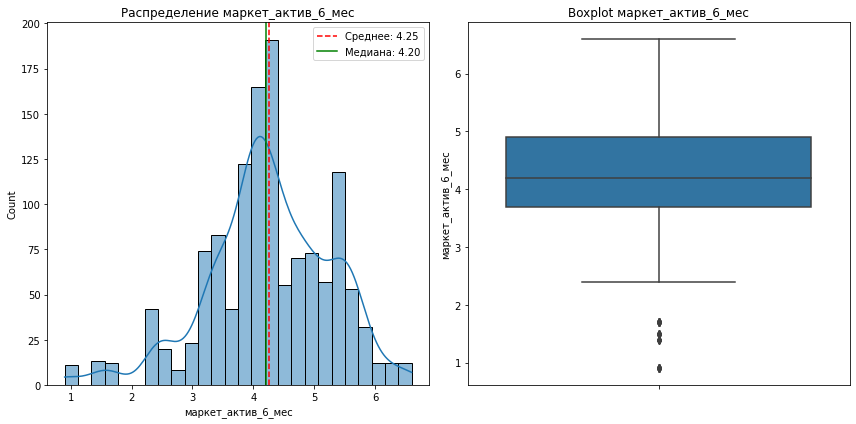

In [ ]:
# Построим график распределения, используя ранее созданную функцию
plot_quantitative_column(market_file, "маркет_актив_6_мес")

"маркет_актив_6_мес" - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

Распределение близко к нормальному, присутсвуют выбросы на показателе 1-2. Медиана близка к среднему, что указывает на симметричное распределение.

Среднее количество маркетинговых коммуникаций на человека в месяц - 4, минимум 1 и максимум 7.

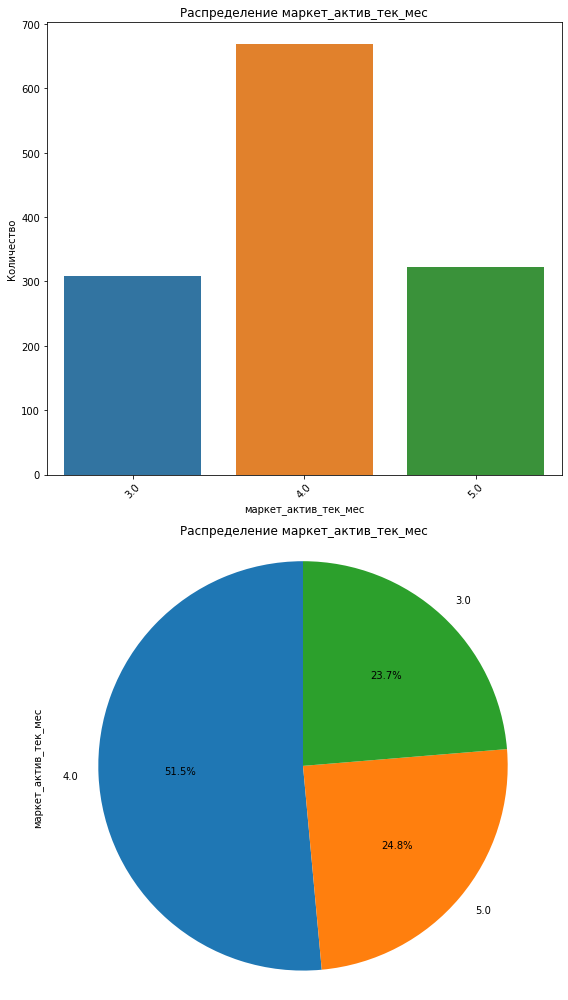

In [ ]:
def plot_discret_column(df, column_name):
    value_counts = df[column_name].value_counts()

    fig, axs = plt.subplots(2, 1, figsize=(8, 14))

    sns.countplot(data=df, x=column_name, ax=axs[0])
    axs[0].set_title(f"Распределение {column_name}")
    axs[0].tick_params(axis="x", rotation=45)
    axs[0].set_xlabel(column_name)  # Установка подписи оси X
    axs[0].set_ylabel("Количество")  # Установка подписи оси Y на русский

    value_counts.plot.pie(autopct="%1.1f%%", startangle=90, ax=axs[1])
    axs[1].set_title(f"Распределение {column_name}")
    axs[1].axis("equal")

    plt.tight_layout()
    plt.show()


# Применение функции
plot_discret_column(market_file, "маркет_актив_тек_мес")

Признак актив_тек_мес показывает количество маркетинговых коммуникаций в текущем месяце.

На графике видно, что количество коммуникаций имеет значения 3, 4 или 5 коммуникаций. Расспределение можно назвать нормальным.

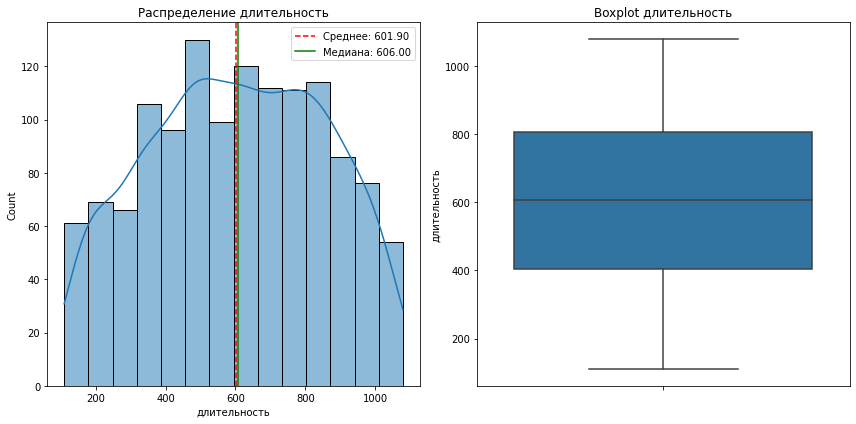

In [ ]:
plot_quantitative_column(market_file, "длительность")

"длительность" — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
Распределение имеет значительный разброс, что указывает на большую вариативность данных. Есть несколько пиков. Медиана близка к среднему.

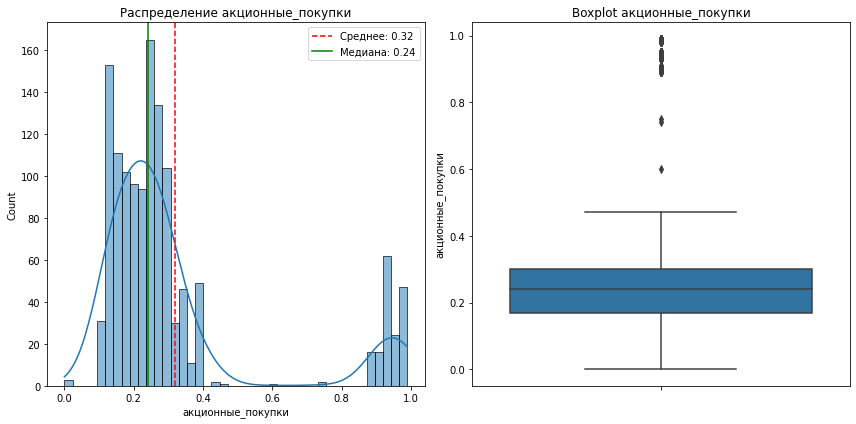

In [ ]:
plot_quantitative_column(market_file, "акционные_покупки")

"акционные_покупки" — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
График имеет два пика, что позволяет выделить два кластера покупателей - те, кто покупает товары почти только по акциям, и  покупателей, которые покупают по акциям менее 50% от общего числа своих покупок. Границу между кластерами можно провести по доле, равной 0,6.

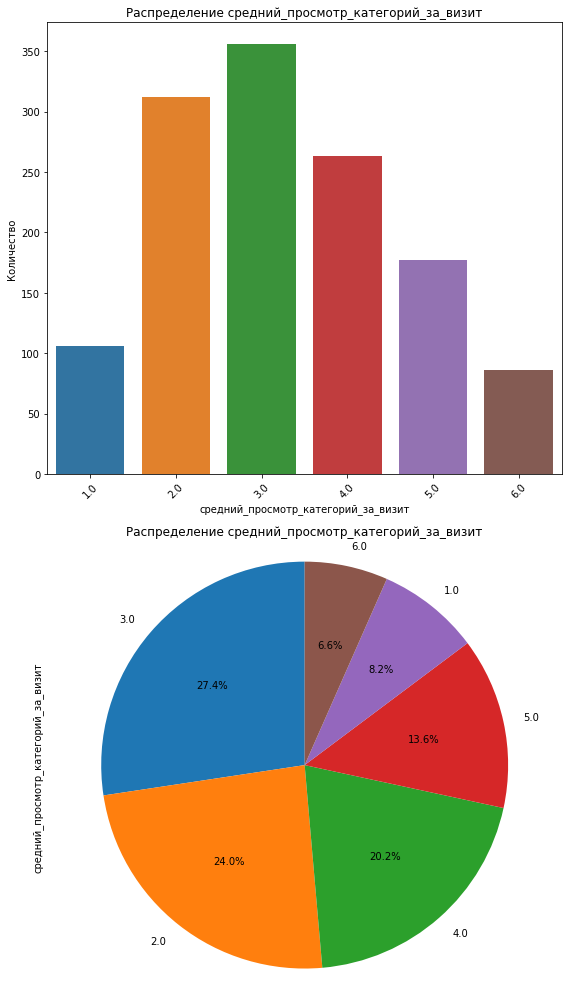

In [ ]:
plot_discret_column(market_file, "средний_просмотр_категорий_за_визит")

"средний_просмотр_категорий_за_визит" — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

Распределение нормальное, среднее и медиана близки друг к другу.

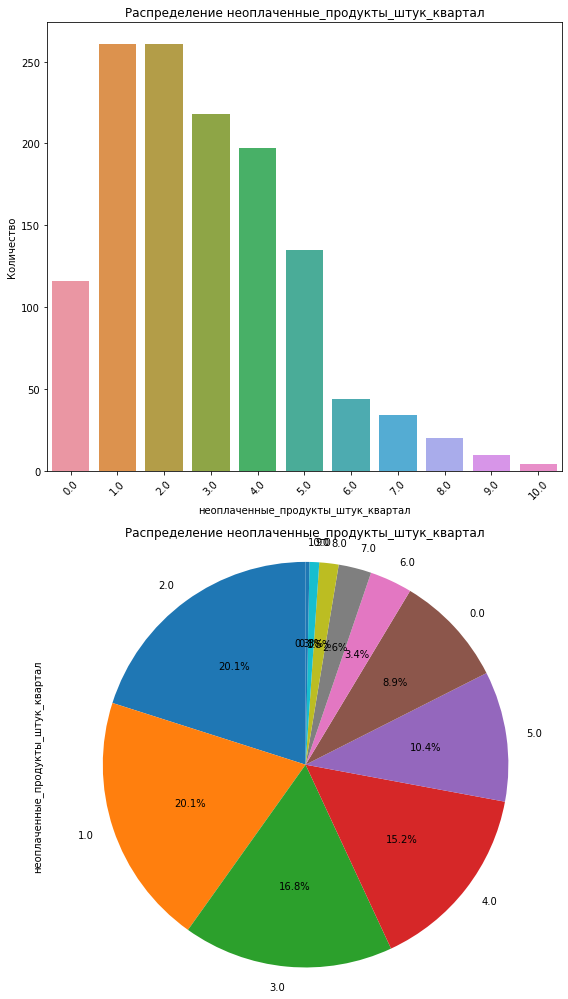

In [ ]:
plot_discret_column(market_file, "неоплаченные_продукты_штук_квартал")

"неоплаченные_продукты_штук_квартал" — общее число неоплаченных товаров в корзине за последние 3 месяца.

Распределение с пологим скосом вправо. Среднее и медиана близки друг к другу. Есть выбросы около 9-10 неоплаченных товаров в корзине. Медиана равна 3.

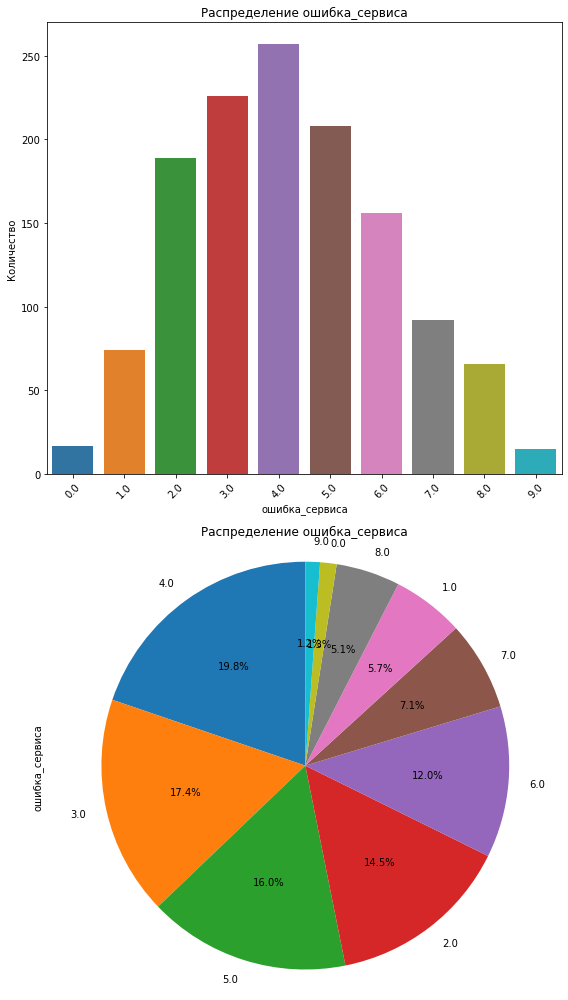

In [ ]:
plot_discret_column(market_file, "ошибка_сервиса")

"ошибка_сервиса" — число сбоев, которые коснулись покупателя во время посещения сайта.

Распределение нормальное, среднее и медиана близки друг к другу.

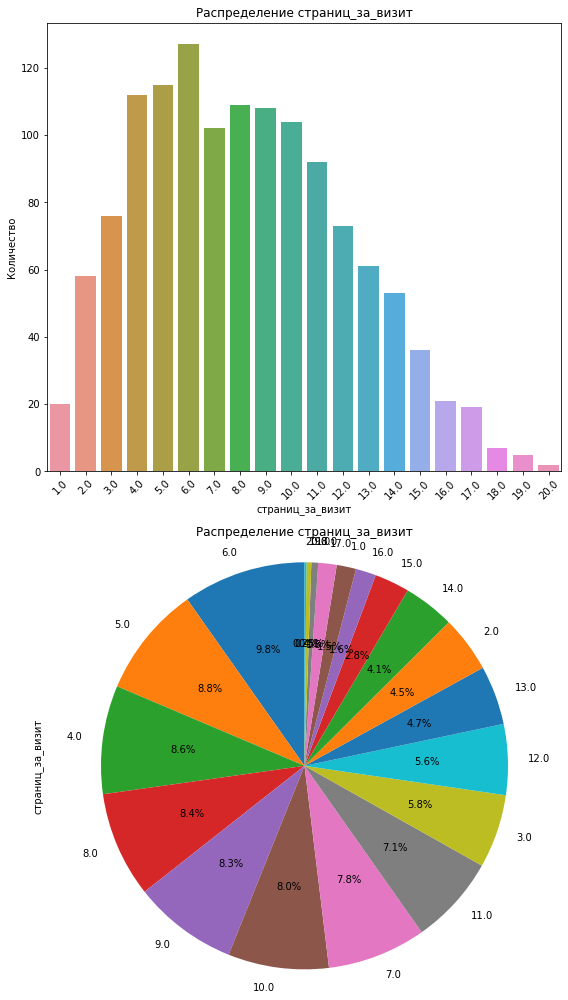

In [ ]:
plot_discret_column(market_file, "страниц_за_визит")

"страниц_за_визит" — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Распредленение имеет скос вправо.

In [ ]:
# Рассмотрим категориальные признаки
categorical_features = [
    "покупательская_активность",
    "тип_сервиса",
    "разрешить_сообщать",
    "популярная_категория",
]

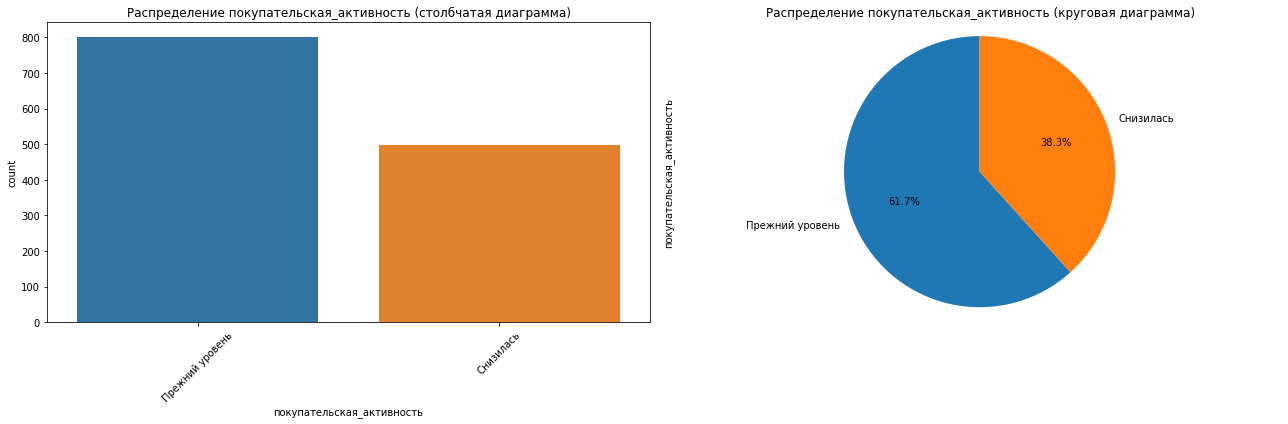

In [ ]:
plot_categorical_column(market_file, "покупательская_активность")

"покупательская_активность" - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

На диаграмме видно, что у значительной части покупателей активность снизилась - 38,3% покупателей снизили свою покупательскую активность, то есть данные не сбалансированы. Нужно выбирать метрику, устойчивую к дисбалансу. При дисбалансе классов Accuracy становится ненадёжной. Лучше  использовать F1, ROC-AUC, precision-recall кривые, они оценивают способность модели разделять классы независимо от порога.

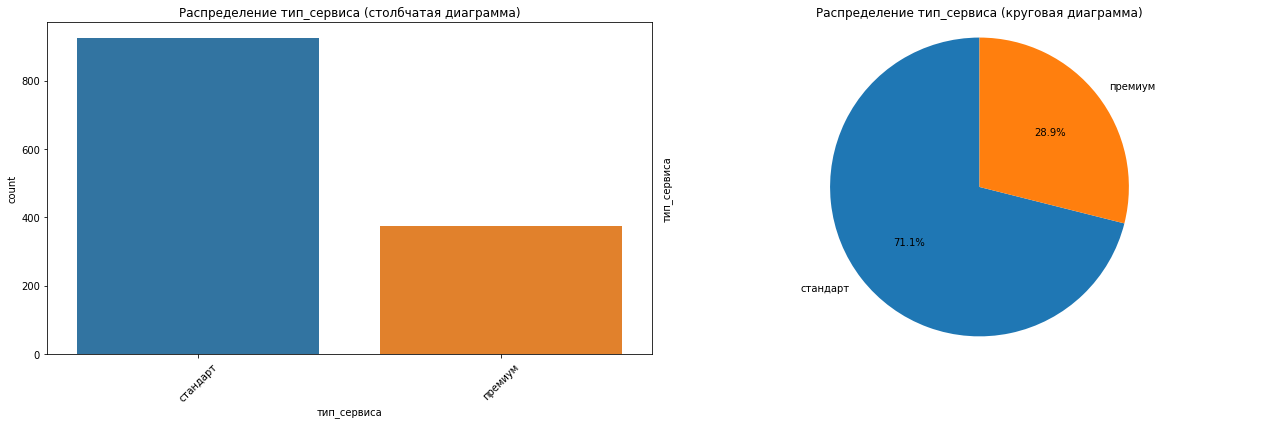

In [ ]:
plot_categorical_column(market_file, "тип_сервиса")

"тип_сервиса" — уровень сервиса, например «премиум» и «стандарт».

Почти треть клиентов имеют тип сервиса "премиум", данные не сбалансированы.

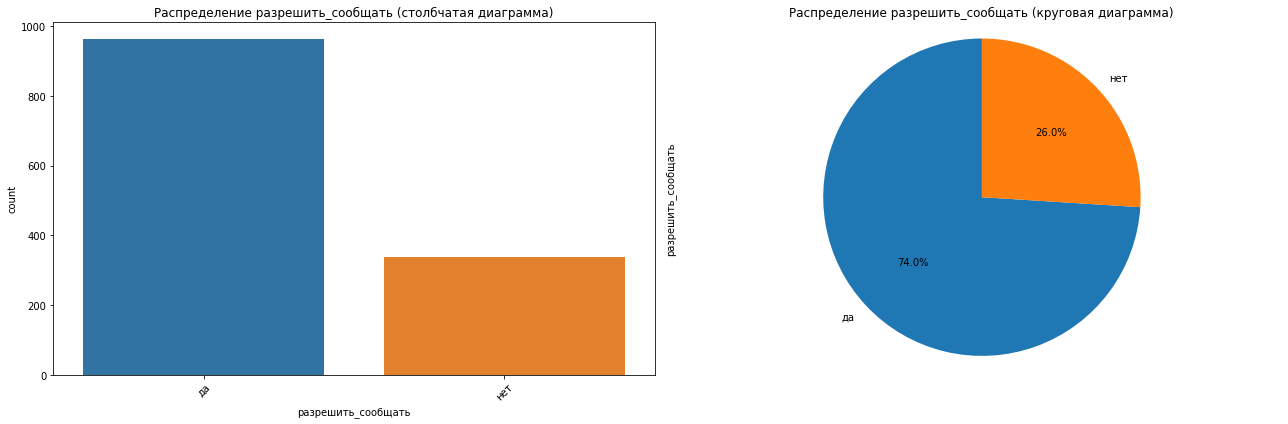

In [ ]:
plot_categorical_column(market_file, "разрешить_сообщать")

"разрешить_сообщать" — информация о том, есть ли согласие покупателя получать дополнительные предложения о товаре.

Не согласны получать рекламные предложения 26% покупателей, данные не сбалансированы.

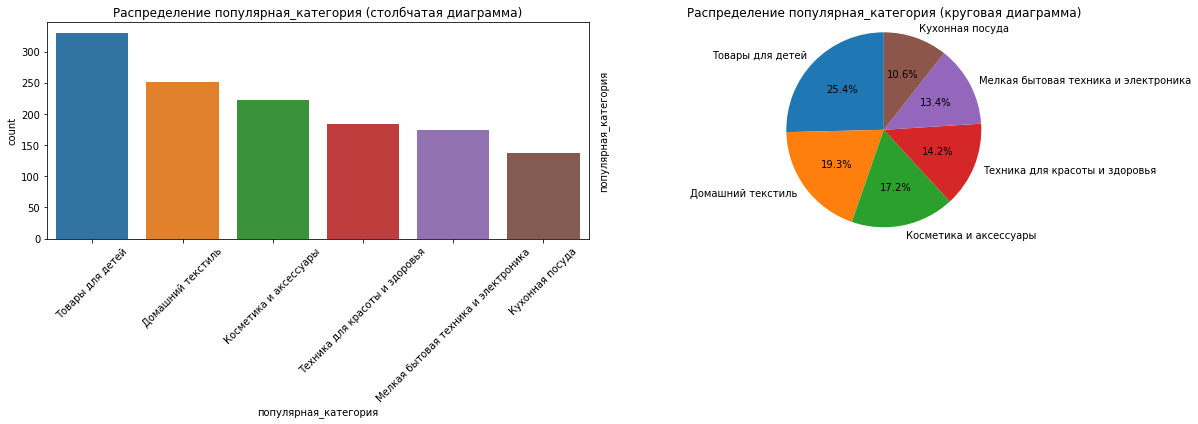

In [ ]:
plot_categorical_column(market_file, "популярная_категория")

"популярная_категория" - самая популярная категория товаров у покупателя за последние 6 месяцев.

Распределение популярных категорий не является равномерным. Некоторые категории, такие как "Товары для детей" и "Домашний текстиль", встречаются чаще, чем другие.

В распределении представлено разнообразие категорий, что указывает на то, что данные охватывают широкий спектр товаров.

Данные не сбалансированы.

##### market_money

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

In [ ]:
# выведем информацию о датафрейме market_money
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1300 non-null   object 
 1   выручка_текущий_месяц        1300 non-null   float64
 2   выручка_предыдущий_месяц     1300 non-null   float64
 3   выручка_препредыдущий_месяц  1300 non-null   float64
dtypes: float64(3), object(1)
memory usage: 40.8+ KB


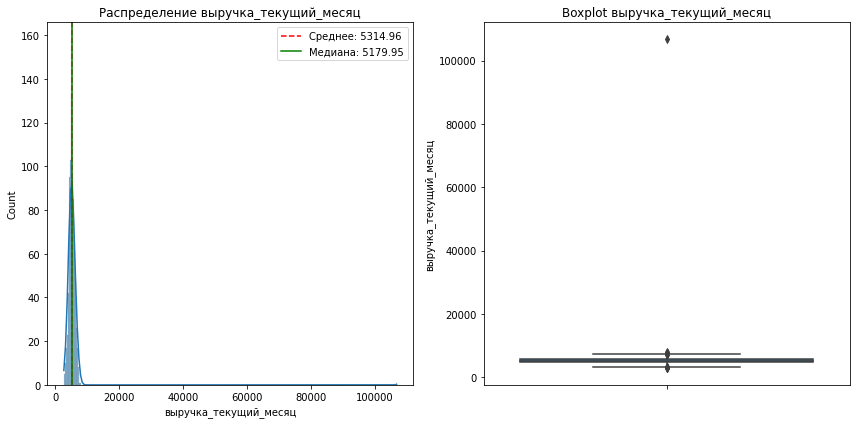

In [ ]:
plot_quantitative_column(market_money, "выручка_текущий_месяц")

На боксплоте виден выброс свыше 100000

In [ ]:
# Выведем точное значение выброса
market_money["выручка_текущий_месяц"].max()

106862.2

In [ ]:
# Выведем строку с выбросом
market_money[market_money["выручка_текущий_месяц"] == 106862.2]

период,id,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц
32,215380,106862.20,6077.00,5051.00


Такой показатель выручки в действительности может иметь место, но для машинного обучения его следует откорректировать, поэтому заменим на среднее значение выручки за этот же месяц

In [ ]:
# Вычислим среднее значение
market_money["выручка_текущий_месяц"].mean()

5314.9608461538455

In [ ]:
row_index = market_money[
    market_money["выручка_текущий_месяц"] == market_money["выручка_текущий_месяц"].max()
].index[0]
# Исправим аномальное значение на среднее значение market_money["выручка_текущий_месяц"]
market_money.loc[row_index, "выручка_текущий_месяц"] = 5314.96

# Проверим - выведем строчку с id покупателя, которая содержал выброс в выручке
market_money[market_money["id"] == "215380"]

период,id,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц
32,215380,5314.96,6077.00,5051.00


Исправления внесены успешно

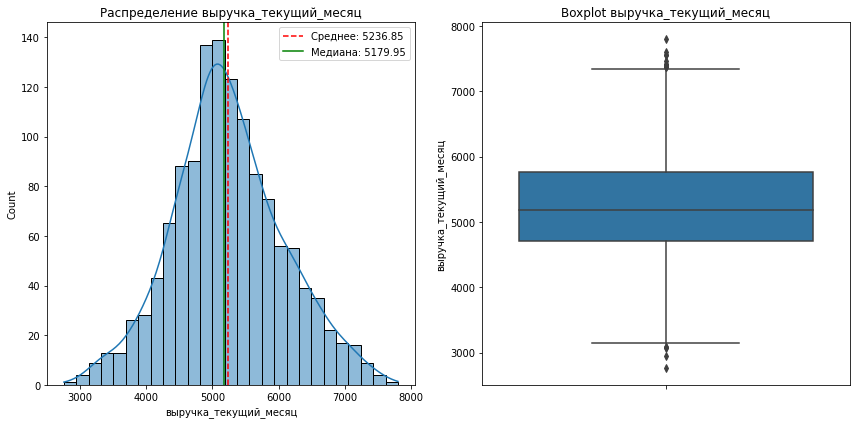

In [ ]:
# Посмотроим графики после удаления аномального выброса
plot_quantitative_column(market_money, "выручка_текущий_месяц")

"выручка_текущий_месяц" - распределение имеет нормальный вид, есть выбросы в обе стороны, но они не столь критичны.

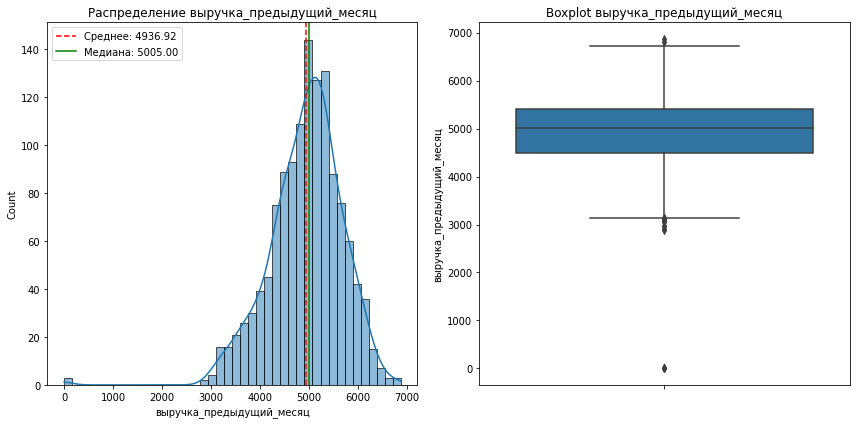

In [ ]:
# Посмотроим графики следущего столбца
plot_quantitative_column(market_money, "выручка_предыдущий_месяц")

На графиках видны выбросы со значением выручки 0. Поскольку нам нужно отобрать только тех пользователей, которые в течение трех месяцев совершали покупки, пользователей с нулевой выручкой следует удалить.

In [ ]:
# Проверим, сколько пользователей имеет нулевую выручку
market_money[market_money["выручка_предыдущий_месяц"] == 0]

период,id,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц
0,215348,3293.10,0.00,0.00
9,215357,5986.30,0.00,0.00
11,215359,4735.00,0.00,0.00


Всего три покупателя, их можно удалить практически без потерь данных.

In [ ]:
market_money = market_money[market_money["выручка_предыдущий_месяц"] != 0]

In [ ]:
# проверим количество id
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 1 to 1299
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1297 non-null   object 
 1   выручка_текущий_месяц        1297 non-null   float64
 2   выручка_предыдущий_месяц     1297 non-null   float64
 3   выручка_препредыдущий_месяц  1297 non-null   float64
dtypes: float64(3), object(1)
memory usage: 50.7+ KB


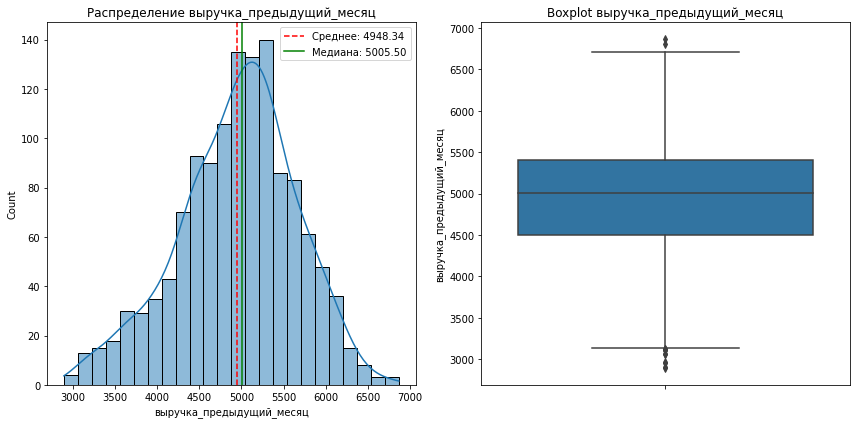

In [ ]:
# Проверим графики распредления
plot_quantitative_column(market_money, "выручка_предыдущий_месяц")

"выручка_предыдущий_месяц" - распределение имеет практически нормальный вид, есть выбросы в обе стороны, но они не столь критичны.

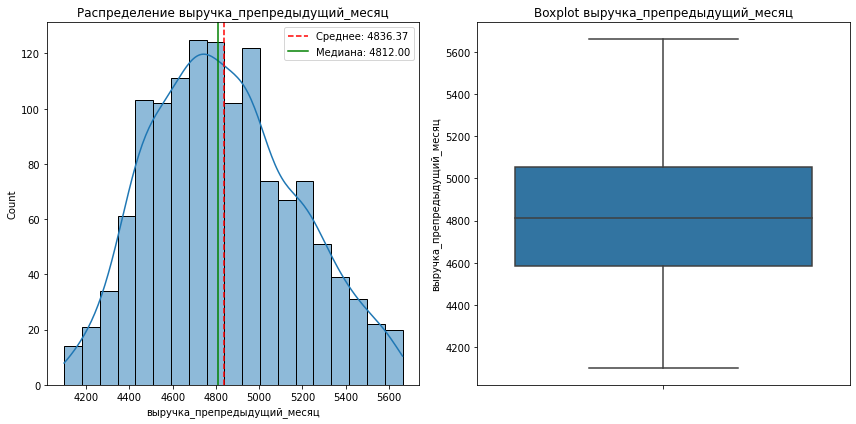

In [ ]:
plot_quantitative_column(market_money, "выручка_препредыдущий_месяц")

"выручка_препредыдущий_месяц" - гистограмма имеет практически нормальное распределение, есть несколько небольших пиков, выбросов нет.

##### market_time

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

In [ ]:
# выведем информацию о датафрейме, чтоб иметь названия столбцов перед глазами.
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   object 
 1   минуты_предыдущий_месяц  1300 non-null   float64
 2   минуты_текущий_месяц     1300 non-null   float64
dtypes: float64(2), object(1)
memory usage: 30.6+ KB


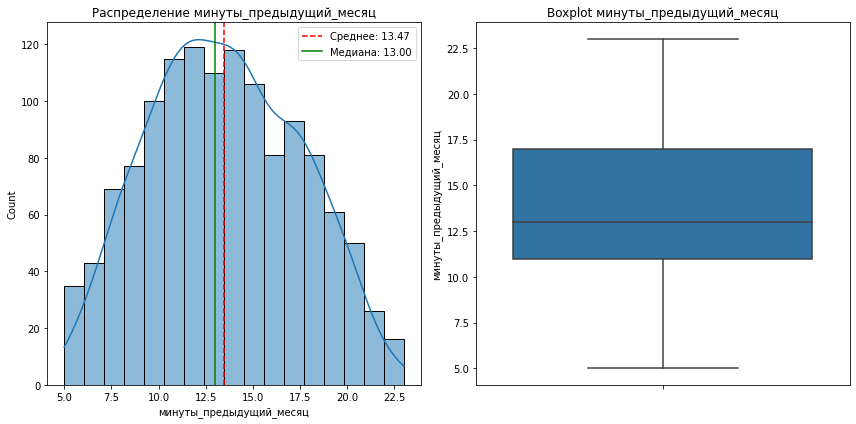

In [ ]:
plot_quantitative_column(market_time, "минуты_предыдущий_месяц")

"минуты_предыдущий_месяц" - значение времени, проведённого на сайте, в минутах, в предыдущий месяц.

Распределение имеет несколько пиков, но ближе к нормальному. Выбросов не наблюдается, медиана и среднее близки друг к другу.

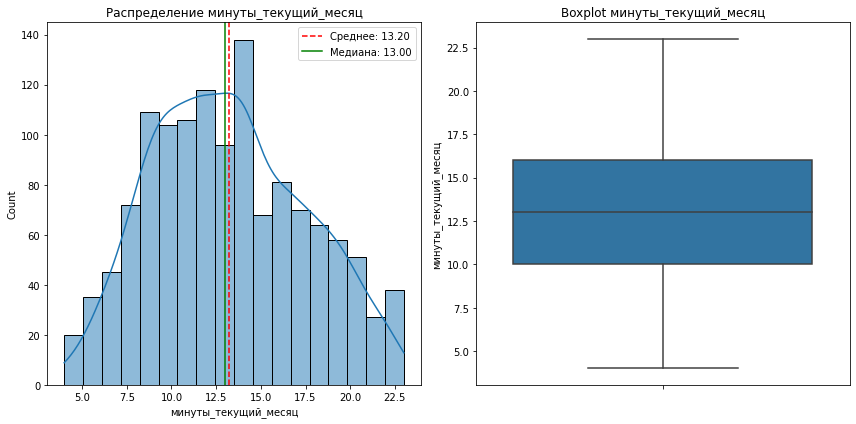

In [ ]:
plot_quantitative_column(market_time, "минуты_текущий_месяц")

"минуты_текущий_месяц" - распределение имеет несколько пиков, но ближе к нормальному. Выбросов не наблюдается, медиана и среднее близки друг к другу.

##### money

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца содержит только один необходимый столбец "прибыль" (без учета столбца id)


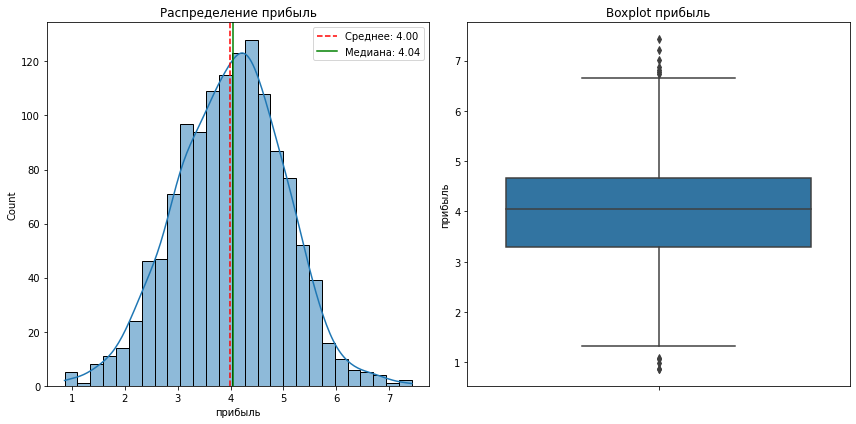

In [ ]:
plot_quantitative_column(money, "прибыль")

"прибыль" - гистограмма среднемесячной прибыли от каждого покупателя имеет куполообразный вид, есть выбросы в обе стороны.

#### Описательные статистики

In [ ]:
# Проведем статистический анализ количественных признаков датафрейма market_file
market_file.describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.00,4.25,1.01,0.90,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.00,4.01,0.70,3.00,4.00,4.00,4.00,5.00
длительность,1300.00,601.90,249.86,110.00,405.50,606.00,806.00,1079.00
акционные_покупки,1300.00,0.32,0.25,0.00,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.00,3.27,1.36,1.00,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.00,2.84,1.97,0.00,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.00,4.19,1.96,0.00,3.00,4.00,6.00,9.00
страниц_за_визит,1300.00,8.18,3.98,1.00,5.00,8.00,11.00,20.00


**маркет_актив_6_мес** - распределение относительно компактное с небольшим стандартным отклонением. Медиана близка к среднему, что указывает на симметричное распределение.

**маркет_актив_тек_мес** - распределение очень компактное с небольшим стандартным отклонением. Все квартили имеют одинаковое значение, что указывает на очень однородное распределение.

**длительность** - распределение имеет значительный разброс, что указывает на большую вариативность данных. Медиана меньше среднего, что может указывать на асимметрию в сторону более низких значений.

**акционные_покупки** - распределение имеет небольшое среднее значение и стандартное отклонение. Большинство значений сконцентрировано в диапазоне от 0 до 0.3.

**средний_просмотр_категорий_за_визит** - распределение имеет умеренный разброс. Медиана близка к среднему, что указывает на относительно симметричное распределение.

**неоплаченные_продукты_штук_квартал** - распределение имеет значительный разброс, что указывает на большую вариативность данных. Наличие нулевых значений и значительного максимального значения указывает на асимметрию.

**ошибка_сервиса** - распределение имеет значительный разброс. Наличие нулевых значений и значительного максимального значения указывает на асимметрию.

**страниц_за_визит** - распределение имеет значительный разброс, что указывает на большую вариативность данных. Медиана меньше среднего, что может указывать на асимметрию в сторону более низких значений.



Некоторые столбцы, такие как "Длительность", "Неоплаченные продукты за квартал", "Ошибки сервиса" и "Страниц за визит", имеют значительный разброс, что указывает на большую вариативность данных.

Распределения некоторых столбцов, таких как "Длительность", "Неоплаченные продукты за квартал", "Ошибки сервиса" и "Страниц за визит", могут быть асимметричными из-за наличия нулевых или очень высоких значений.

Столбцы "Маркет активность за 6 месяцев" и особенно "Маркет активность за текущий месяц" имеют очень компактные распределения с небольшим стандартным отклонением.

In [ ]:
# Проведем статистический анализ количественных признаков датафрейма market_money
market_money.describe().T

,count,mean,std,min,25%,50%,75%,max
период,,,,,,,,
выручка_текущий_месяц,1297.00,5238.16,834.00,2758.70,4706.60,5180.30,5758.60,7799.40
выручка_предыдущий_месяц,1297.00,4948.34,701.23,2890.00,4498.50,5005.50,5409.00,6869.50
выручка_препредыдущий_месяц,1297.00,4836.37,333.44,4098.00,4585.00,4812.00,5055.00,5663.00


**выручка_текущий_месяц**  - распределение имеет умеренный разброс. Медиана близка к среднему, что указывает на относительно симметричное распределение.

**выручка_предыдущий_месяц** - распределение также имеет умеренный разброс. Медиана близка к среднему, что указывает на симметричное распределение.

**выручка_препредыдущий_месяц** - распределение имеет небольшой разброс. Стандартное отклонение значительно меньше, чем у двух других столбцов, что указывает на более компактное распределение.

Среднее значение выручки снижается от текущего месяца к препредыдущему, что может указывать на тенденцию к уменьшению выручки во времени.

Выручка текущего и предыдущего месяцев имеет более высокий разброс, чем препредыдущего месяца, что может быть связано с различными факторами, такими как сезонность или изменения в рыночных условиях.

Распределение выручки препредыдущего месяца более компактное, что может указывать на стабильность в этот период.

In [ ]:
# Проведем статистический анализ количественных признаков датафрейма market_time
market_time.describe().T

,count,mean,std,min,25%,50%,75%,max
период,,,,,,,,
минуты_предыдущий_месяц,1300.00,13.47,3.93,5.00,11.00,13.00,17.00,23.00
минуты_текущий_месяц,1300.00,13.20,4.22,4.00,10.00,13.00,16.00,23.00


**минуты_предыдущий_месяц** - распределение имеет умеренный разброс. Медиана близка к среднему, что указывает на симметричное распределение.

**минуты_текущий_месяц** - аспределение также имеет умеренный разброс. Медиана близка к среднему, что указывает на симметричное распределение.

Среднее значение времени в текущем месяце немного ниже, чем в предыдущем, что может указывать на небольшое уменьшение времени взаимодействия.

Оба столбца имеют схожий разброс, что указывает на стабильность в вариативности данных.

Распределения обоих столбцов относительно компактны, что может указывать на стабильность в поведении пользователей.

In [ ]:
# Проведем статистический анализ количественных признаков датафрейма money
money.describe().T

,count,mean,std,min,25%,50%,75%,max
прибыль,1300.00,4.00,1.01,0.86,3.30,4.04,4.67,7.43


Распределение прибыли относительно компактное с небольшим стандартным отклонением. Это указывает на то, что большинство значений сконцентрировано вокруг среднего значения.

Медиана (4.04) близка к среднему (4.00), что может указывать на симметричное распределение.

Несмотря на компактность, есть значительный разброс между минимальным и максимальным значениями, что может указывать на разные уровни прибыли от различных покупателей.

Максимальное значение (7.43) значительно выше среднего, что может указывать на существование покупателей, приносящих существенно большую прибыль.

Исследование корреляций между прибылью и другими признаками может помочь выявить факторы, влияющие на прибыль.

####  Вывод

Исходя из проведенного анализа можно сделать следующие выводы.

Большинство числовых признаков (например, "маркет_актив6мес", "актив_тек_мес", "средний_просмотр_категорий_за_визит") имеют относительно симметричные распределения, близкие к нормальному.

Признаки "длительность", "неоплаченные_продукты_штук_квартал", "ошибка_сервиса" и "страниц_за_визит" демонстрируют значительный разброс и асимметрию.

Выручка в разных месяцах имеет умеренный разброс, с тенденцией к уменьшению от текущего к препредыдущему месяцу.

Категориальные переменные "тип_сервиса", "разрешить_сообщать" и "популярная_категория" имеют неравномерное распределение, что может повлиять на моделирование.

Целевая переменная "покупательская_активность" не сбалансирована, что может потребовать корректировки во время моделирования (например, перевзвешивание классов).



В качестве подготовки данных для машинного обучения необходимо выполнить преобразование категориальных переменных в числовые с помощью OneHotEncoder или OrdinalEncoder.

Использовать методы перевзвешивания классов или генерации синтетических данных для балансировки классов.

Провести масштабирование и нормализацию - применить StandardScaler или MinMaxScaler для числовых признаков, чтобы уменьшить влияние шкал измерения.


Оценить модель с помощью метрики ROC-AUC.

Интерпретация результатов с помощью SHAP значения для понимания вклада каждого признака в предсказания модели.

## Объединение таблиц

Объединим таблицы market_file.csv, market_money.csv, market_time.csv по ключу id

In [ ]:
merged_data = pd.merge(market_file, market_money, on="id")
df_full = pd.merge(merged_data, market_time, on="id")

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   object 
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   float64
 6   длительность                         1297 non-null   float64
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   float64
 10  неоплаченные_продукты_штук_квартал   1297 non-null   float64
 11  ошибка_сервиса                

## Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

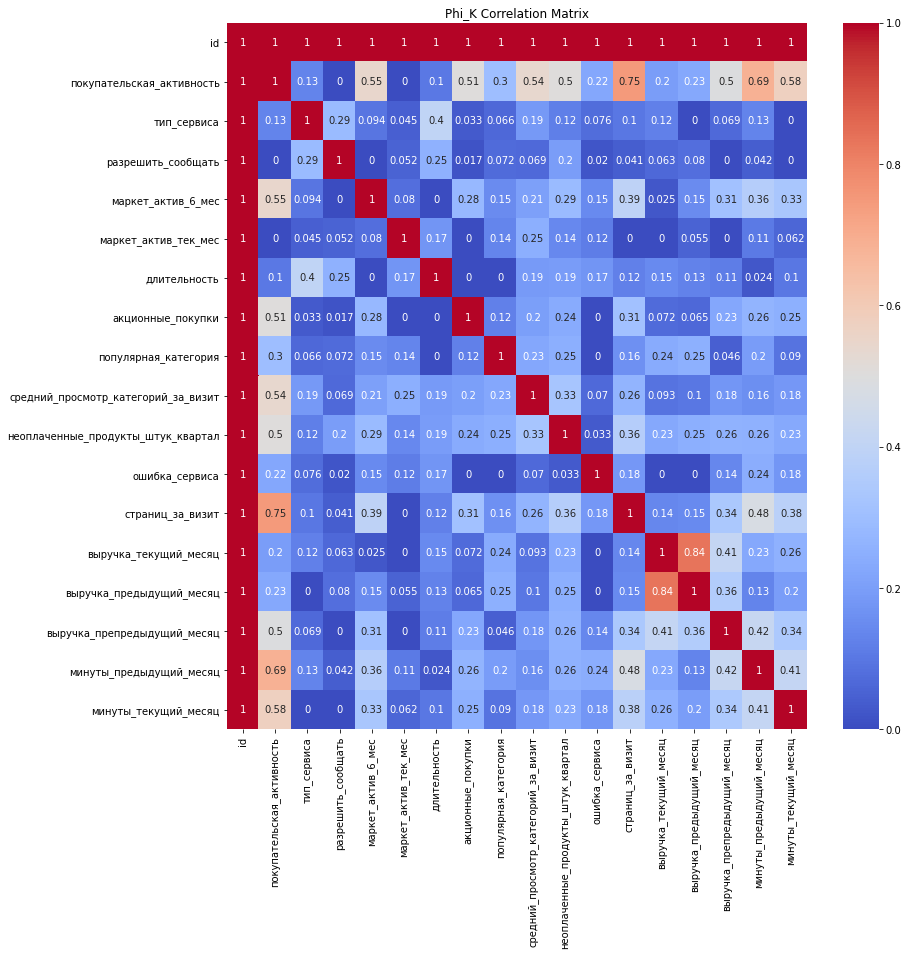

In [ ]:
# Установим "руками", если не установлена
!pip install phik -q

# Импортируем
import phik
import pandas as pd


# Вычисление матрицы корреляции с использованием phik
corr_matrix = df_full.phik_matrix(
    interval_cols=[
        "маркет_актив_6_мес",
        "маркет_актив_тек_мес",
        "длительность",
        "акционные_покупки",
        "средний_просмотр_категорий_за_визит",
        "неоплаченные_продукты_штук_квартал",
        "страниц_за_визит",
        "выручка_текущий_месяц",
        "выручка_предыдущий_месяц",
        "выручка_препредыдущий_месяц",
        "минуты_предыдущий_месяц",
        "минуты_текущий_месяц",
    ]
)

# Визуализация матрицы корреляции
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Phi_K Correlation Matrix")
plt.show()

Стоит обратить внимание на значение корреляции:<br />
- 0.75 между покупательской активностью и страниц за визит;<br />
- 0.85 между выручкой текущего месяца и выручкой предыдущего месяца.<br />
<br />
Это показатели высокой взаимозависимости признаков. <br />
В паре выручка_текущего_месяца/выручка_предыдущего_месяца корреляция высокий, но, на мой взгляд, нельзя избавиться от какого-то столбца нельзя, тк они нужны, чтобы  видеть динамику между этими показателями. Возьмем на заметку.<br />
Остальные признаки имеют коэффициент менее 0,7, то есть средняя сила зависимости или отсутствие зависимости.</font>
</div>

## Использование пайплайнов

Применим все изученные модели с помощью использования пайплайна.

In [ ]:
# Разделим данные с использованием стратификации stratify=y,
# чтобы сохранить пропорции классов в целевой переменной y
X = df_full.drop(columns=["покупательская_активность", "id"])
y = df_full["покупательская_активность"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

In [ ]:
df_full.shape

(1297, 18)

In [ ]:
X_train.shape

(972, 16)

In [ ]:
y_train.shape

(972,)

In [ ]:
X_test.shape

In [ ]:
y_test.shape

(325,)

Поскольку целевой признак содержит категориальные данные, используем  LabelEncoder для его преобразования в числовую переменную.

In [ ]:
# Создадим экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# Oбучим модель
label_encoder.fit(y_train)

# Трансформируем тренировочную и тестовую выборку
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Проверка соответствия классов и кодированных значений
print("Классы и их кодированные значения:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls}: {i}")

Классы и их кодированные значения:
Прежний уровень: 0
Снизилась: 1


In [ ]:
# Создадим списки столбцов для OneHotEncoder и SimpleImputer
ohe_columns = ["разрешить_сообщать", "популярная_категория"]
ord_columns = ["тип_сервиса"]

# Признаки для StandardScaler
num_std_columns = [
    "длительность",
    "акционные_покупки",
    "средний_просмотр_категорий_за_визит",
    "неоплаченные_продукты_штук_квартал",
    "ошибка_сервиса",
    "страниц_за_визит",
    "выручка_текущий_месяц",
    "выручка_предыдущий_месяц",
    "выручка_препредыдущий_месяц",
    "минуты_предыдущий_месяц",
    "минуты_текущий_месяц",
]

# Признаки для MinMaxScaler
num_minmax_columns = [
    "маркет_актив_тек_мес",
    "маркет_актив_6_мес",
]

# Создание пайплайнов для обработки признаков
ohe_pipe = Pipeline(
    [
        (
            "ohe",
            OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"),
        ),
    ]
)

ord_pipe = Pipeline(
    [
        (
            "ord",
            OrdinalEncoder(
                categories=[["премиум", "стандарт"]],
                handle_unknown="use_encoded_value",
                unknown_value=-1,
            ),
        )
    ]
)

num_std_pipe = Pipeline(
    [
        ("scaler_std", StandardScaler()),
    ]
)

num_minmax_pipe = Pipeline(
    [
        ("scaler_minmax", MinMaxScaler()),
    ]
)

# Создание ColumnTransformer
data_preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", ohe_pipe, ohe_columns),
        ("ord", ord_pipe, ord_columns),
        ("num_std", num_std_pipe, num_std_columns),
        ("num_minmax", num_minmax_pipe, num_minmax_columns),
    ],
    remainder="passthrough",
)

In [ ]:
# Cоздаем итоговый пайплайн
pipe_final = Pipeline(
    [
        ("preprocessor", data_preprocessor),
        ("models", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

In [ ]:
# Создаем список параметров для поиска для разных моделей
param_grid = [
    {
        "models": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 7),
        "models__max_features": range(2, 7),
        "preprocessor__num_std__scaler_std": [StandardScaler(), MinMaxScaler()],
        "preprocessor__num_minmax__scaler_minmax": [StandardScaler(), MinMaxScaler()],
    },
    {
        "models": [KNeighborsClassifier()],
        "models__n_neighbors": range(2, 7),
        "preprocessor__num_std__scaler_std": [StandardScaler(), MinMaxScaler()],
        "preprocessor__num_minmax__scaler_minmax": [StandardScaler(), MinMaxScaler()],
    },
    {
        "models": [LogisticRegression(random_state=RANDOM_STATE)],
        "models__C": range(1, 7),
        "models__penalty": ["l1", "l2", "elasticnet", "none"],
        "models__solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
        "preprocessor__num_std__scaler_std": [StandardScaler(), MinMaxScaler()],
        "preprocessor__num_minmax__scaler_minmax": [StandardScaler(), MinMaxScaler()],
    },
    {
        "models": [SVC(random_state=RANDOM_STATE, probability=True)],
        "models__C": [1, 9, 15],
        "models__kernel": ["linear", "rbf", "poly"],
        "preprocessor__num_std__scaler_std": [StandardScaler(), MinMaxScaler()],
        "preprocessor__num_minmax__scaler_minmax": [StandardScaler(), MinMaxScaler()],
    },
]

Будем использовать метрику ROC-AUC для оценки качества модели, поскольку задача предполагает бинарную классификацию (покупательская_активность), классы в данных несбалансированы (различное количество экземпляров каждого класса) и ROC-AUC легко интерпретируется.

In [ ]:
# Поиск лучших параметров
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring="roc_auc",
    random_state=RANDOM_STATE,
    n_jobs=-1,
)
randomized_search.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('ord',
                                                                                                OrdinalEncoder(categories=[['премиум',
                                                                                                                            'стандар...
                                         'preprocessor__num_std__scaler_std': [StandardScaler(),
                                                                               MinMaxScaler()]},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': [1, 9, 15],
                                         'models__kernel': ['linear', 'rbf',
                                                            'poly'],
                                         'preprocessor__num_minmax__scaler_minmax': [StandardScaler(),
                                                                                     MinMaxScaler()],
                                         'preprocessor__num_std__scaler_std': [StandardScaler(),
                                                                               MinMaxScaler()]}],
                   random_state=42, scoring='roc_auc')

In [ ]:
# Вывод результатов
print("Лучшая модель и её параметры:\n\n", randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['премиум',
                                                  

In [ ]:
# Вывод результатов
print(
    "Метрика ROC-AUC лучшей модели на тренировочной выборке:",
    randomized_search.best_score_,
)

y_test_pred_proba = randomized_search.predict_proba(X_test)
print(
    f"Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred_proba[:, 1])}"
)

Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.8973254609981882
Метрика ROC-AUC на тестовой выборке: 0.9225244744021825


#### Вывод

Для комплексной обработки данных и подготовки их для обучения моделей машинного обучения был созданы пайплайны, в которх были выполнены следующие шаги для обработки данных:

- Использован OneHotEncoder для категориальных признаков ("разрешить_сообщать", "популярная_категория"), OrdinalEncoder для категориального признака "тип_сервиса".

- Для признаков с широким диапазоном значений и большим разбросом ("длительность", "неоплаченные_продукты_штук_квартал", "ошибка_сервиса", "страниц_за_визит", "выручка_текущий_месяц", "выручка_предыдущий_месяц", "выручка_препредыдущий_месяц", "минуты_предыдущий_месяц", "минуты_текущий_месяц", "маркет_актив6мес") использован StandardScaler.

- Для признаков с ограниченным диапазоном ("маркет_актив_тек_мес", "маркет_актив_6_мес") использован MinMaxScaler.

- Все обработки были объединены в ColumnTransformer, чтобы применять их к соответствующим признакам одновременно.

- Обработанные данные использовались для обучения различных моделей (например, DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC) в пайплайне.

- Использован RandomizedSearchCV для поиска оптимальных гиперпараметров для каждой модели.

- Лучшая модель оценивалась на тестовой выборке с помощью метрик, таких как ROC-AUC.

Лучшей моделью стала  LogisticRegression(C=1, random_state=42, solver='liblinear').

Метрика лучшей модели на тренировочной выборке: 0.8973254609981882
Метрика ROC-AUC на тестовой выборке: 0.9224041084898089



## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

In [ ]:
model = LogisticRegression(C=1, random_state=42, solver="liblinear")

In [ ]:
# применим пайплайн для кодировки входящих признаком на тренировочной и тестовой выбoрке
X_train_shap = pd.DataFrame(
    pipe_final.named_steps["preprocessor"].fit_transform(X_train),
    columns=pipe_final.named_steps["preprocessor"].get_feature_names_out(),
)

In [ ]:
X_test_shap = pd.DataFrame(
    pipe_final.named_steps["preprocessor"].transform(X_test),
    columns=pipe_final.named_steps["preprocessor"].get_feature_names_out(),
)

In [ ]:
# обучeние модели
model.fit(X_train_shap, y_train_encoded)

LogisticRegression(C=1, random_state=42, solver='liblinear')

In [ ]:
# Предсказание прогнозов модели
y_test_pred_proba = model.predict_proba(X_test_shap)

# Вывод метрики ROC-AUC на тестовой выборке
print(
    f"Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred_proba[:, 1])}"
)

Метрика ROC-AUC на тестовой выборке: 0.9230059380516771


In [ ]:
# Значения SHAP для модели черного ящика
explainer = shap.LinearExplainer(model, X_train_shap)

In [ ]:
# Расчет SHAP значений
shap_values = explainer(X_test_shap)

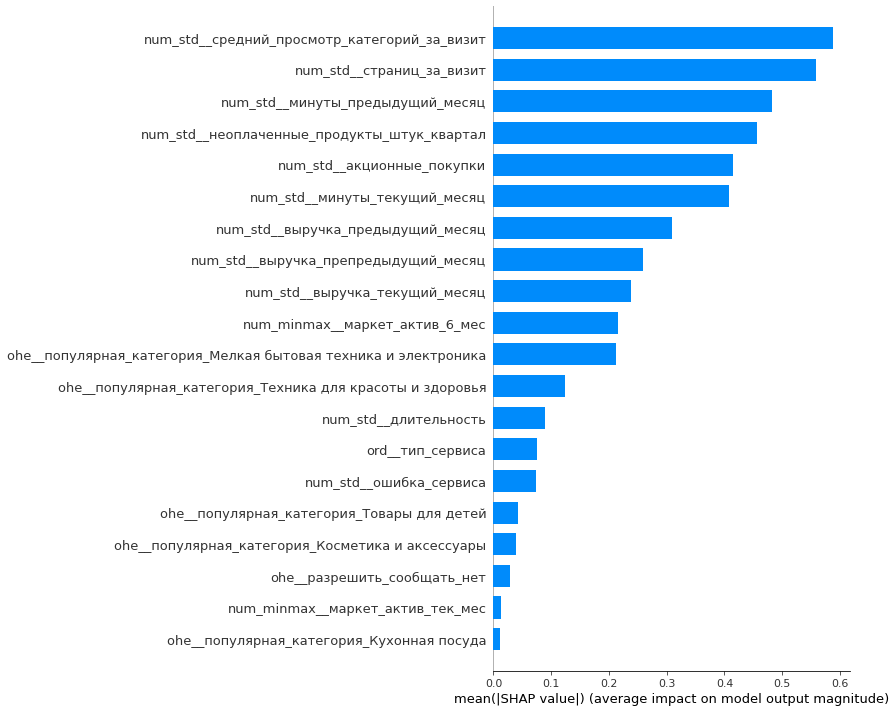

In [ ]:
# Отображение всех признаков в виде баров с большим размером графика
shap.summary_plot(shap_values, X_test_shap, plot_type="bar", plot_size=(12, 10))

По степени важности лидируют  группы признаков продуктового поведения (средний просмотр категорий за визит, неоплаченные товары, акционные покупки) и поведения на сайте (количество страниц за визит, время на сайте), и только потом финансовое поведение (выручка по месяцам.)

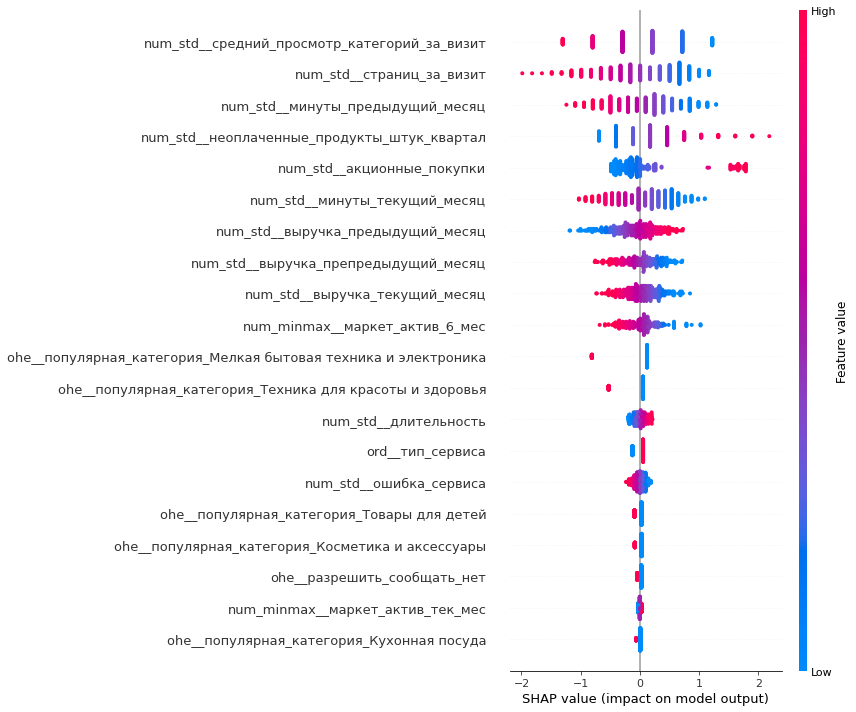

In [ ]:
# Отображение всех признаков
shap.summary_plot(shap_values, X_test_shap, plot_size=(12, 10))

В данном исследовании положительное значение целевого признака - это статус покупательской активности "снижен".

Признаки, склоняющие модель отнести объект к классу 1 (положительные красные значения) - это неоплаченные товары, акционые покупки и выручка в предыдущий месяц.


Признаки, склоняющие модель отнести объект к классу 0 (отрицательные красные значения): средний просмотр категорий за визит, страниц за визит, минуты на сайте в предудщем месяце, минуты в текущем месяце, а также выручка в педыдущий и препредыдущий месяца.


На основе полученного графика можно сделать следующие выводы:

- наличие неоплаченных товаров является индикатором снижения покупательской активности

- акционые покупки связаны со снижением общей покупательской активности

- высокая выручка в прошлом месяце не привела к сохранению покупательской активности в текущем месяце.

- активность на сайте (просмотр категорий, страниц и время на сайте) является положительным индикатором покупательской активности.

- низкая выручка в прошлых месяцах не привела к снижению покупательской активности в текущем месяце.

## Сегментация покупателей

Выполним сегментацию покупателей, выделим покупателей с высокой долей акционных покупок и высокой долей неоплаченных товаров.
Возьмем долю "акционные_покупки" от 0.6 и выше, а "неоплаченные_продукты_штук_квартал" более медианы, равной 3.

In [ ]:
# Определим сегмент
def segment_customers(df):
    segments = []
    for index, row in df.iterrows():
        if (
            row["акционные_покупки"] > 0.6
            and row["неоплаченные_продукты_штук_квартал"] > 3
        ):
            segments.append("Высокая доля акций и много неоплаченных")
        else:
            segments.append("Другие")
    return segments


# Создадим столбец в исходном датафрейме
df_full["сегмент"] = segment_customers(df_full)

# Выделим в отдельный датафрейм
df_target_segment = df_full[
    df_full["сегмент"] == "Высокая доля акций и много неоплаченных"
]

# Вывод датафрейма с выделенным сегментом
df_target_segment.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,сегмент
0,215349,Снизилась,премиум,да,4.40,4.00,819.00,0.75,Товары для детей,4.00,4.00,2.00,5.00,4971.60,5216.00,4472.00,12.00,10.00,Высокая доля акций и много неоплаченных
11,215362,Снизилась,премиум,да,4.20,4.00,438.00,0.74,Домашний текстиль,3.00,4.00,6.00,4.00,4447.90,4314.00,4765.00,13.00,13.00,Высокая доля акций и много неоплаченных
14,215365,Снизилась,стандарт,да,3.90,4.00,167.00,0.95,Техника для красоты и здоровья,6.00,4.00,2.00,5.00,4799.30,4577.00,4190.00,6.00,10.00,Высокая доля акций и много неоплаченных
22,215373,Снизилась,премиум,нет,3.80,3.00,811.00,0.90,Товары для детей,2.00,5.00,5.00,3.00,5161.10,4632.00,4293.00,10.00,8.00,Высокая доля акций и много неоплаченных
49,215400,Снизилась,стандарт,нет,4.40,5.00,304.00,0.94,Товары для детей,1.00,4.00,3.00,2.00,5691.40,5681.00,4439.00,11.00,9.00,Высокая доля акций и много неоплаченных


In [ ]:
df_target_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 1296
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   81 non-null     object 
 1   покупательская_активность            81 non-null     object 
 2   тип_сервиса                          81 non-null     object 
 3   разрешить_сообщать                   81 non-null     object 
 4   маркет_актив_6_мес                   81 non-null     float64
 5   маркет_актив_тек_мес                 81 non-null     float64
 6   длительность                         81 non-null     float64
 7   акционные_покупки                    81 non-null     float64
 8   популярная_категория                 81 non-null     object 
 9   средний_просмотр_категорий_за_визит  81 non-null     float64
 10  неоплаченные_продукты_штук_квартал   81 non-null     float64
 11  ошибка_сервиса                  

Условию сегментации удовлетворяют 81 покупатель

In [ ]:
# сгруппируем и выведем типы столбцов нового датафрейма
sort_columns_by_type(df_target_segment)

(['id',
  'покупательская_активность',
  'тип_сервиса',
  'разрешить_сообщать',
  'популярная_категория',
  'сегмент'],
 ['маркет_актив_6_мес',
  'маркет_актив_тек_мес',
  'длительность',
  'акционные_покупки',
  'средний_просмотр_категорий_за_визит',
  'неоплаченные_продукты_штук_квартал',
  'ошибка_сервиса',
  'страниц_за_визит',
  'выручка_текущий_месяц',
  'выручка_предыдущий_месяц',
  'выручка_препредыдущий_месяц',
  'минуты_предыдущий_месяц',
  'минуты_текущий_месяц'])

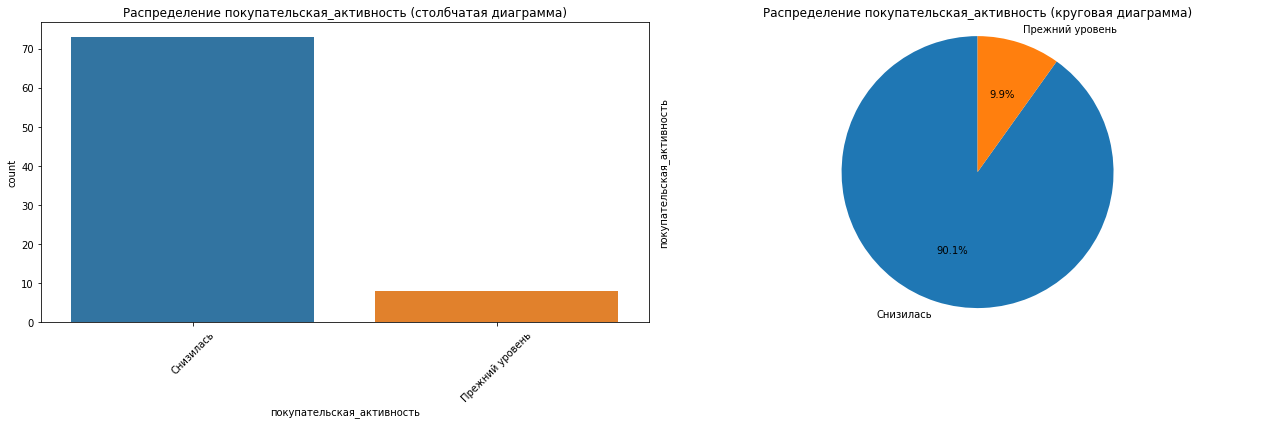

In [ ]:
plot_categorical_column(df_target_segment, "покупательская_активность")

В выделенном сегменте у 90% покупателей активность имеет маркировку "снизилась". Это, действительно, категория покупателей с высокой вероятностью снижения покупательской активности.

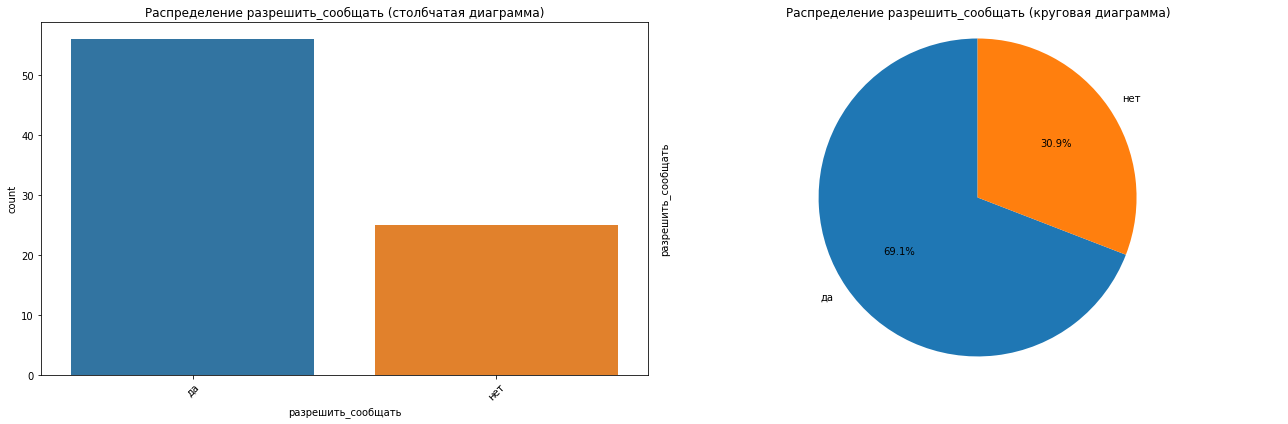

In [ ]:
plot_categorical_column(df_target_segment, "разрешить_сообщать")

30% от общей выборки не давали согласия на маркетинговые коммуникации. То есть, для них недоступны методы стимулирования активности посредством рекламных рассылок, но их можно заинтересовывать другими способами, такими как активным предложением рекомендованных товаров на страницах сайта.

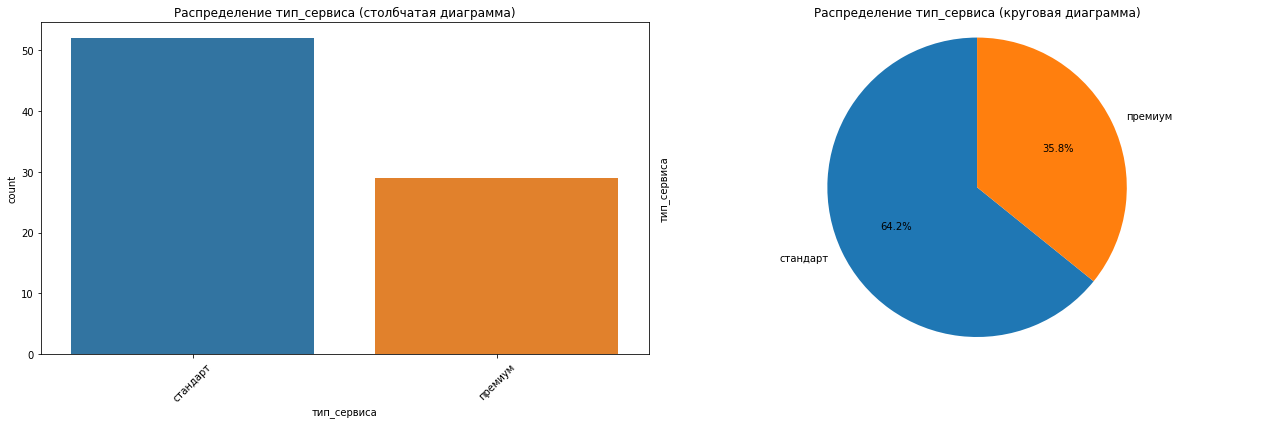

In [ ]:
plot_categorical_column(df_target_segment, "тип_сервиса")

Соотношение типов сервиса почти совпадает с соотношением в основной выборке (70:30).

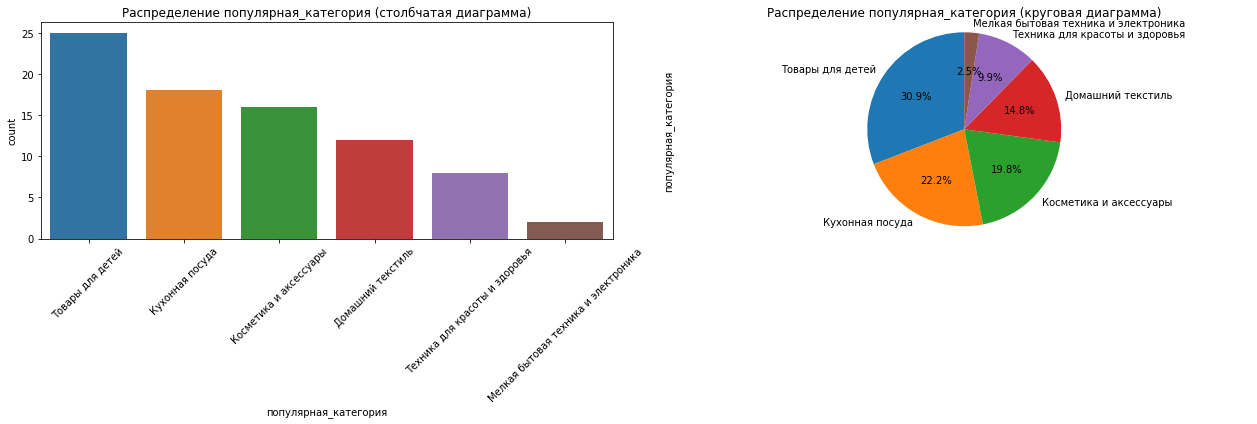

In [ ]:
plot_categorical_column(df_target_segment, "популярная_категория")

У 30% покупателей из данного сегмента есть дети, также это чаще покупатели, интересующиеся кухонной посудой, а также косметикой и аксессуарами. Есть вероятность, что это женщины и девушки. Стоило бы запросить индивидуальные данные о покупателях, чтобы лучше охарактеризовать представителей сегмента по полу и .

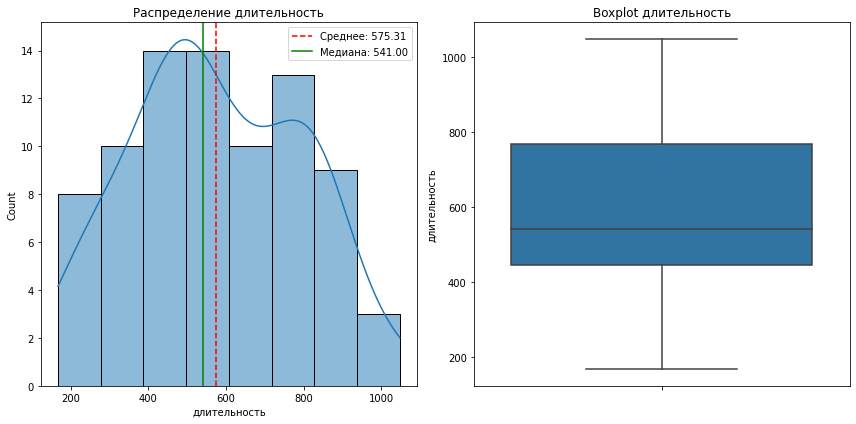

In [ ]:
plot_quantitative_column(df_target_segment, "длительность")

Медиана 541 минуты, это немного меньше, чем в основной выборке (600), то есть, маркетинговая активность слегка снижена.

Для увеличения покупательской активности выделенного сегмента покупателей с высокой долей акционных покупок и большим количеством неоплаченных товаров можно предложить следующие стратегии:

1. Персонализированные акции и скидки на неоплаченные товары - предложить дополнительные скидки на неоплаченные товары, чтобы стимулировать их оплату; специальные акции для этого сегмента, которые будут доступны только им.

2. Разделение оплаты - предлагать рассрочку или кредиты на неоплаченные товары в корзине. Предоставить различные варианты оплаты, включая оплату при получении (для этого стоит произвести анализ невыкупленных заказов)

3. Напоминания о брошенных корзинах - регулярно отправлять напоминания о неоплаченных товарах в корзине. Рассылки с персонализированными предложениями тем, кто на них давал согласие, на основе их истории покупок.

4. Повышение лояльности- ввести программу лояльности, которая будет вознаграждать покупателей за повторные покупки. Предоставить покупателям этого сегмента эксклюзивные преимущества, такие как приоритетная доставка или доступ к новым продуктам раньше других.

5. Отслеживание результатов: постоянно отслеживать эффективность предложений и корректировать стратегию на основе полученных данных.

## Общий вывод


Сделайте общий вывод:
опишите задачу;
опишите исходные данные и проведённую предобработку;
напишите, что вы сделали для поиска лучшей модели;
укажите лучшую модель;
добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.
Оформление
Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Используйте форматирование и заголовки.
Обратите внимание: структуру исследования в Jupyter Notebook вам нужно создать самостоятельно.

В рамках предобработки изучены четыре датафрейма.

Типы данных были скорректированы для соответствия описанию.

Пропусков и явных дубликатов не обнаружено.

Неявные дубликаты и ошибки в категориальных данных исправлены.

Проведено преобразование таблиц c с помощью pivot_table() (созданы столбцы для данных по периодам).

Все названия столбцов приведены к нижнему регистру с сохранением кириллических названий.

Данные соответствуют описанию.



В ходе иссделовательского анализа данных выявленно, что большинство числовых признаков (например, "маркет_актив6мес", "актив_тек_мес", "средний_просмотр_категорий_за_визит") имеют относительно симметричные распределения, близкие к нормальному.

Признаки "длительность", "неоплаченные_продукты_штук_квартал", "ошибка_сервиса" и "страниц_за_визит" демонстрируют значительный разброс и асимметрию.

Выручка в разных месяцах имеет умеренный разброс, с тенденцией к уменьшению от текущего к препредыдущему месяцу.

Категориальные переменные "тип_сервиса", "разрешить_сообщать" и "популярная_категория" имеют неравномерное распределение, что может повлиять на моделирование.

Целевая переменная "покупательская_активность" не сбалансирована, что может потребовать корректировки во время моделирования (например, перевзвешивание классов).

Объединены таблицы market_file.csv, market_money.csv, market_time.csv по ключу id.

В ходе корреляционного анализа мультиколленеарность не выявлена.

Для комплексной обработки данных и подготовки их для обучения моделей машинного обучения был созданы пайплайны, в которх были выполнены следующие шаги для обработки данных:

Использован OneHotEncoder для категориальных признаков ("разрешить_сообщать", "популярная_категория"), OrdinalEncoder для категориального признака "тип_сервиса".

Для признаков с широким диапазоном значений и большим разбросом ("длительность", "неоплаченные_продукты_штук_квартал", "ошибка_сервиса", "страниц_за_визит", "выручка_текущий_месяц", "выручка_предыдущий_месяц", "выручка_препредыдущий_месяц", "минуты_предыдущий_месяц", "минуты_текущий_месяц", "маркет_актив6мес") использован StandardScaler.

Для признаков с ограниченным диапазоном ("маркет_актив_тек_мес", "маркет_актив6мес") использован MinMaxScaler.

Все обработки были объединены в ColumnTransformer, чтобы применять их к соответствующим признакам одновременно.

Обработанные данные использовались для обучения различных моделей (например, DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC) в пайплайне.

Использован RandomizedSearchCV для поиска оптимальных гиперпараметров для каждой модели.

Лучшая модель оценивалась на тестовой выборке с помощью метрик, таких как ROC-AUC.

Лучшей моделью стала LogisticRegression(C=1, random_state=42, solver='liblinear').

Метрика лучшей модели на тренировочной выборке: 0.8973254609981882 Метрика ROC-AUC на тестовой выборке: 0.9224041084898089

На основе анализа важности признаков с помощью SHAP можно сделать следующие выводы:

- наличие неоплаченных товаров является индикатором снижения покупательской активности

- акционые покупки связаны со снижением общей покупательской активности

- высокая выручка в прошлом месяце не привела к сохранению покупательской активности в текущем месяце.

- активность на сайте (просмотр категорий, страниц и время на сайте) является положительным индикатором покупательской активности.

- низкая выручка в прошлых месяцах не привела к снижению покупательской активности в текущем месяце.

Выполнена сегментация покупателей - выделена когорта покупателей с высокой долей акционных покупок и высокой долей неоплаченных товаров. Возьмем долю "акционные_покупки" от 0.6 и выше, а "неоплаченные_продукты_штук_квартал" более медианы, равной 3.по долю "акционные_покупки" от 0.6 и выше, а "неоплаченные_продукты_штук_квартал" более медианы, равной 3.
Для увеличения покупательской активности выделенного сегмента покупателей с высокой долей акционных покупок и большим количеством неоплаченных товаров можно предложить следующие стратегии:

1. Персонализированные акции и скидки на неоплаченные товары - предложить дополнительные скидки на неоплаченные товары, чтобы стимулировать их оплату; специальные акции для этого сегмента, которые будут доступны только им.

2. Разделение оплаты - предлагать рассрочку или кредиты на неоплаченные товары в корзине. Предоставить различные варианты оплаты, включая оплату при получении (для этого стоит произвести анализ невыкупленных заказов)

3. Напоминания о брошенных корзинах - регулярно отправлять напоминания о неоплаченных товарах в корзине. Рассылки с персонализированными предложениями тем, кто на них давал согласие, на основе их истории покупок.

4. Повышение лояльности- ввести программу лояльности, которая будет вознаграждать покупателей за повторные покупки. Предоставить покупателям этого сегмента эксклюзивные преимущества, такие как приоритетная доставка или доступ к новым продуктам раньше других.

5. Отслеживание результатов: постоянно отслеживать эффективность предложений и корректировать стратегию на основе полученных данных.